augumetacja - rozszerzenie albo zmiany w zbiorze, aby zniwelować przeuczenie

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import BatchNormalization

es = EarlyStopping(monitor = "val_loss", mode = "min", patience = 5)

EPOCHS = 100

In [2]:
from keras.preprocessing.image import ImageDataGenerator

root_path = "flowers/"

gen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2
)
#dodatkowe parametry, które on może wykorzystać - np. obrót obrazka

# Load Data
train_ds = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes = os.listdir(root_path), #klasy nazwij tak, jak nazywają się foldery w folderze flowers
    shuffle=True,
    batch_size=32,
    target_size=(128,128),
    subset="training"
)

valid_ds = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes = os.listdir(root_path),
    shuffle=True,
    batch_size=32,
    target_size=(128,128),
    subset="validation"
)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [3]:
classes = os.listdir(root_path) #stwórz listę, w której będą nazwy klas. Stwórz ją na podstawie nazw folderów

In [4]:
classes

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

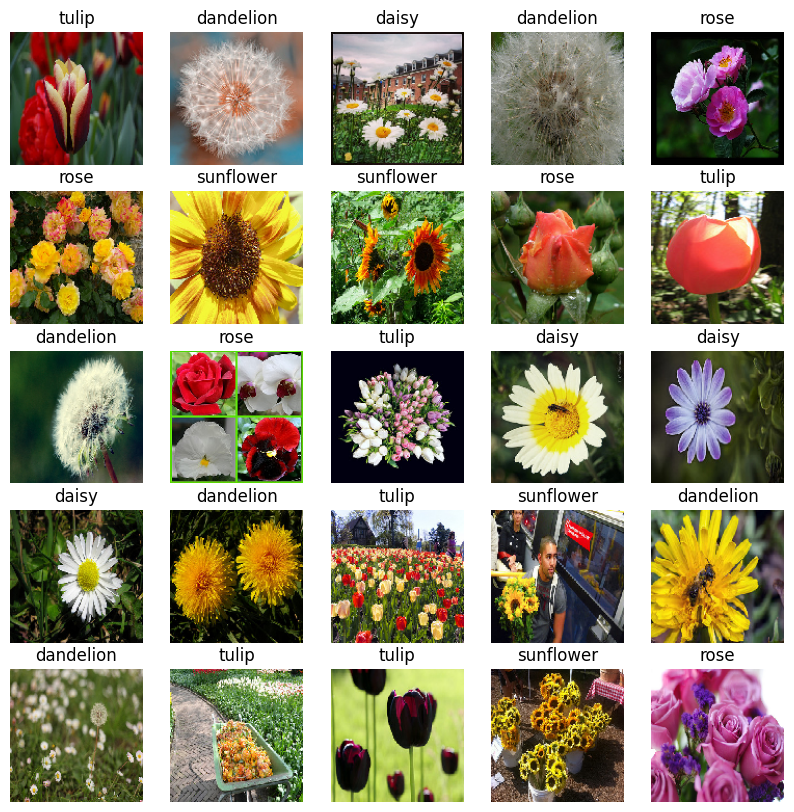

In [5]:
plt.figure(figsize=(10,10))
img, label = train_ds.next()
for i in range(1,26):
    plt.subplot(5,5,i)
    plt.imshow(img[i])
    plt.axis('off')
    plt.title(classes[np.argmax(label[i,:])])
    
# ponieważ labele są w formacie [0,0,1,0,0], poleceniem argmax sprawdzamy, na którym miejscu
# jest jedynka. W powyższym przykładzie na pozycji 2. Oznacza to, że taki label wskazuje 
# na "rose".
# classes[np.argmax(label[i,:])] ->
# classes[np.argmax([0,0,1,0,0])] ->
# classes[2] -> "rose"

    

In [6]:
# Stwórz dwa modele.  
# Pierwszy bez augumentacji - dane należy wczytać na nowo.  Drugi z augumentacją i z 
# wykorzystaniem danych wczytanych u góry. Stwórz wykresy dla obu i porównaj.
# W pierwszym modelu dostosuj liczbę warstw maksymalizując accuracy. Następnie dla
# dokładnie takiego samego modelu powtórz te czynności, wykorzystując dane z augumentacją.

In [7]:
model = Sequential()
model.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(5, activation = 'softmax'))

model.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 16)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 63504)             0         
                                                                 
 dense (Dense)               (None, 512)               32514560  
                                                                 
 dense_1 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 32,517,573
Trainable params: 32,517,573
Non-trainable params: 0
____________________________________________

In [8]:
history = model.fit(train_ds, epochs = EPOCHS, validation_data=(valid_ds), callbacks = [es])

Epoch 1/100
109/109 [==============================] - 25s 226ms/step - loss: 2.7399 - accuracy: 0.4333 - val_loss: 1.2220 - val_accuracy: 0.4953
Epoch 2/100
109/109 [==============================] - 24s 222ms/step - loss: 0.9861 - accuracy: 0.6211 - val_loss: 1.1970 - val_accuracy: 0.5267
Epoch 3/100
109/109 [==============================] - 24s 223ms/step - loss: 0.6761 - accuracy: 0.7616 - val_loss: 1.1371 - val_accuracy: 0.5860
Epoch 4/100
109/109 [==============================] - 25s 226ms/step - loss: 0.4430 - accuracy: 0.8635 - val_loss: 1.2050 - val_accuracy: 0.5651
Epoch 5/100
109/109 [==============================] - 25s 226ms/step - loss: 0.2245 - accuracy: 0.9407 - val_loss: 1.2829 - val_accuracy: 0.5698
Epoch 6/100
109/109 [==============================] - 25s 226ms/step - loss: 0.1231 - accuracy: 0.9722 - val_loss: 1.3794 - val_accuracy: 0.5791
Epoch 7/100
109/109 [==============================] - 24s 224ms/step - loss: 0.0647 - accuracy: 0.9928 - val_loss: 1.4918 -

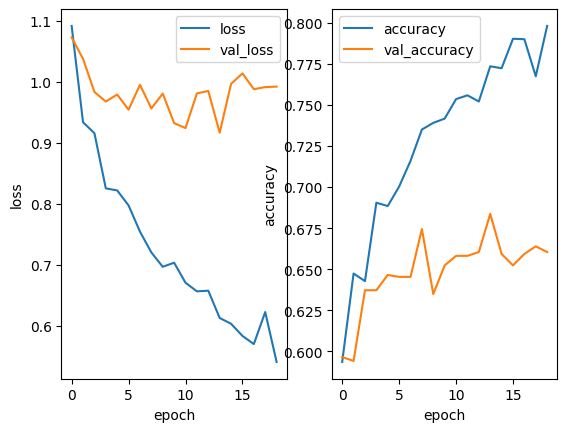

In [12]:
hist = pd.DataFrame(history.history)
hist

plt.subplot(1,2,1)
plt.plot(hist.loss, label = "loss")
plt.plot(hist.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist.accuracy, label = "accuracy")
plt.plot(hist.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()

In [9]:
from keras.preprocessing.image import ImageDataGenerator

root_path = "flowers/"

gen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20, 
    validation_split=0.2
)
#dodatkowe parametry, które on może wykorzystać - np. obrót obrazka

# Load Data
train_ds = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes = os.listdir(root_path), #klasy nazwij tak, jak nazywają się foldery w folderze flowers
    shuffle=True,
    batch_size=32,
    target_size=(128,128),
    subset="training"
)

valid_ds = gen.flow_from_directory(
    root_path,
    class_mode="categorical",
    classes = os.listdir(root_path),
    shuffle=True,
    batch_size=32,
    target_size=(128,128),
    subset="validation"
)


Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [10]:
model1 = Sequential()
model1.add(Conv2D(filters = 16, kernel_size = (3, 3), activation='relu', input_shape=(128, 128, 3)))
model1.add(MaxPooling2D((2, 2)))
model1.add(Flatten())
model1.add(Dense(512, activation = 'relu'))
model1.add(Dense(5, activation = 'softmax'))

model1.compile(optimizer='adam', loss= 'categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 126, 126, 16)      448       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 63, 63, 16)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 63504)             0         
                                                                 
 dense_2 (Dense)             (None, 512)               32514560  
                                                                 
 dense_3 (Dense)             (None, 5)                 2565      
                                                                 
Total params: 32,517,573
Trainable params: 32,517,573
Non-trainable params: 0
__________________________________________

In [11]:
history = model.fit(train_ds, epochs = EPOCHS, validation_data=(valid_ds), callbacks = [es])

Epoch 1/100
109/109 [==============================] - 34s 314ms/step - loss: 1.0912 - accuracy: 0.5936 - val_loss: 1.0724 - val_accuracy: 0.5965
Epoch 2/100
109/109 [==============================] - 34s 315ms/step - loss: 0.9334 - accuracy: 0.6474 - val_loss: 1.0373 - val_accuracy: 0.5942
Epoch 3/100
109/109 [==============================] - 34s 309ms/step - loss: 0.9153 - accuracy: 0.6428 - val_loss: 0.9830 - val_accuracy: 0.6372
Epoch 4/100
109/109 [==============================] - 34s 312ms/step - loss: 0.8249 - accuracy: 0.6905 - val_loss: 0.9672 - val_accuracy: 0.6372
Epoch 5/100
109/109 [==============================] - 34s 310ms/step - loss: 0.8215 - accuracy: 0.6885 - val_loss: 0.9787 - val_accuracy: 0.6465
Epoch 6/100
109/109 [==============================] - 34s 310ms/step - loss: 0.7969 - accuracy: 0.7003 - val_loss: 0.9539 - val_accuracy: 0.6453
Epoch 7/100
109/109 [==============================] - 34s 309ms/step - loss: 0.7540 - accuracy: 0.7159 - val_loss: 0.9948 -

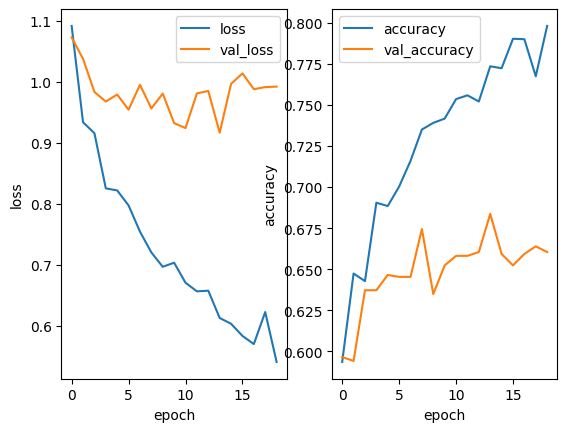

In [14]:
hist1 = pd.DataFrame(history.history)

plt.subplot(1,2,1)
plt.plot(hist1.loss, label = "loss")
plt.plot(hist1.val_loss, label = "val_loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.subplot(1,2,2)
plt.plot(hist1.accuracy, label = "accuracy")
plt.plot(hist1.val_accuracy, label = "val_accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()